<a href="https://colab.research.google.com/github/AurelienCD/Formation_OCR_Ing_Machine_Learning/blob/main/P6_01_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connexion au google drive, déplacement dans le dossier contenant les données nécessaires au projet

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
%cd drive/MyDrive/Formation_OCR_Ing_Machine_Learning/Projet 6

/content/drive/MyDrive/Formation_OCR_Ing_Machine_Learning/Projet 6


Importation des librairies nécessaires au projet

In [4]:
#instalation librairie:
%pip install SimpleITK

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48.4 MB 1.7 MB/s 


In [5]:
import pandas as pad 
import numpy as np
from numpy.core.numeric import NaN

import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import statistics
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import seaborn as sn
import pandas 
import sys, time, os
import random
from PIL import Image
import SimpleITK as sitk

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from joblib import dump, load
from scipy import linalg
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
### ACD ###
image_directory="Images_samples_10_races"

doc importation des données keras : 
https://keras.io/api/data_loading/image/#image_dataset_from_directory-function

In [ ]:
X=[]
Y=[]
for path, dirs, files in os.walk(image_directory):
    for file in files:
        image_filepath = os.path.join(path, file)
        image = Image.open(image_filepath) 
        X.append(np.asarray(image))
        NomRace=path.split("-")[-1]
        Y.append(NomRace)
         

#convert images list to array
X=np.asarray(X)
Y=np.asarray(Y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  del sys.path[0]


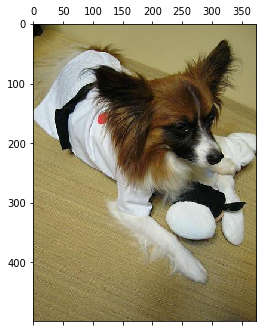

In [ ]:
plt.matshow(X[0])

In [ ]:
Y[0]

'papillon'

In [ ]:
dump(X, "image_sample.joblib")
dump(Y, "label.joblib")

['label.joblib']

In [55]:
X_raw = load("image_sample.joblib")
Y = load("label.joblib")

# Préprocessing des images

## Taille des images

In [ ]:
taille_x_images = []
taille_y_images = []
for elm in X:
    taille_x_images.append(elm.shape[0])
    taille_y_images.append(elm.shape[1])    

In [ ]:
print("la taille en x minimale des images est de : " + str(min(taille_x_images)))
print("la taille en y minimale des images est de : " + str(min(taille_y_images)))

la taille en x minimale des images est de : 100
la taille en y minimale des images est de : 97


In [ ]:
taille_x_min = min(taille_x_images)
taille_y_min = min(taille_y_images)

In [ ]:
############# lecture des fichiers image ###########
i = 0
for file in image_filepath_sample:
    image = Image.open(file)  
    resized_image = image.resize((taille_x_min,taille_y_min))
    imgray = resized_image.convert(mode='L') # graysacle
    imgray.save("Images_samples_10_races_resized_gray/" + str(i) + ".jpg")
    i += 1

In [ ]:
X_resized=[]
for path, dirs, files in os.walk("Images_samples_10_races_resized_gray"):
    for file in files:
        resized_image_np = sitk.GetArrayFromImage(sitk.ReadImage("Images_samples_10_races_resized_gray/" + file))
        X_resized.append(np.asarray(resized_image_np))     

#convert images list to array
X_resized=np.asarray(X_resized)

papillon


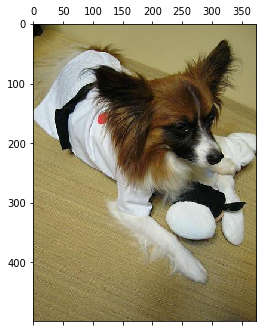

In [ ]:
plt.matshow(X[0])
print(Y[0])

papillon


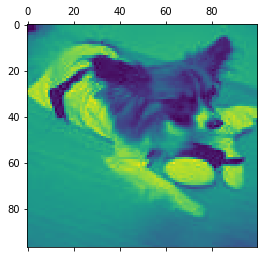

In [ ]:
plt.matshow(X_resized[0])
print(Y[0])

Le but de cette approche est d'avoir la même taille d'image pour toutes les images, de façon à rendre le modèle plus performant

In [ ]:
X.shape

(1942,)

In [ ]:
X_resized.shape

(1942, 97, 100)

In [ ]:
dump(X_resized, "matrice_image_resized.joblib")

['matrice_image_resized.joblib']

In [14]:
X = load("matrice_image_resized.joblib")
Y = load("label.joblib")

## Equalization

In [ ]:
def image_equalizor(img_array):
    """ perform image equalization """

    ######################################
    # PERFORM HISTOGRAM EQUALIZATION
    ######################################

    """
    STEP 1: Normalized cumulative histogram
    """
    #flatten image array and calculate histogram via binning
    histogram_array = np.bincount(img_array.flatten(), minlength=256)

    #normalize
    num_pixels = np.sum(histogram_array)
    histogram_array = histogram_array/num_pixels

    #normalized cumulative histogram
    chistogram_array = np.cumsum(histogram_array)


    """
    STEP 2: Pixel mapping lookup table
    """
    transform_map = np.floor(255 * chistogram_array).astype(np.uint8)


    """
    STEP 3: Transformation
    """
    # flatten image array into 1D list
    img_list = list(img_array.flatten())

    # transform pixel values to equalize
    eq_img_list = [transform_map[p] for p in img_list]

    # reshape and write back into img_array
    eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)

    return eq_img_array

In [ ]:
test = image_equalizor(X[0])

In [ ]:
test

array([[  0,   0,   1, ..., 128, 125, 119],
       [  4,   1,   0, ..., 130, 128, 121],
       [  0,   0,   0, ..., 135, 130, 128],
       ...,
       [ 74,  76,  78, ...,  48,  48,  48],
       [ 71,  73,  76, ...,  46,  46,  46],
       [ 74,  78,  79, ...,  43,  44,  45]], dtype=uint8)

In [ ]:
X_equal = []
for elm in X:
    X_equal.append(image_equalizor(elm))

X_equal = np.array(X_equal)

Avant equalization

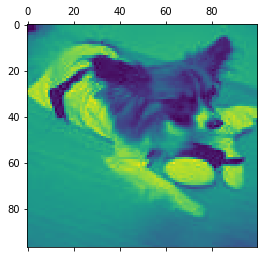

In [ ]:
plt.matshow(X[0])

Après equalization

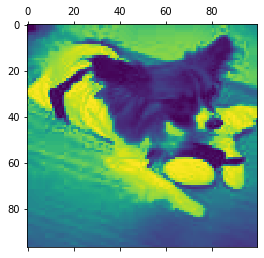

In [ ]:
plt.matshow(X_equal[0])

Le but de cette approche est d'égaliser les histogrammes des images entre elles de façon à augmenter les contrastes et améliorer les input du modèle

In [ ]:
dump(X, "equalized_image.joblib")

['equalized_image.joblib']

In [6]:
X = load("equalized_image.joblib")
Y = load("label.joblib")

## Whitening

In [ ]:
X.shape

(1942, 97, 100)

In [ ]:
# Center data
# By subtracting mean for each feature
x_norm = X.T - np.mean(X.T, axis=0)
x_norm = x_norm.T
print('x_norm.shape:', x_norm.shape, '\n')

x_norm.shape: (1942, 97, 100) 



In [ ]:
def image_whitenor(xc):
    """ Performe the whitning process on a matrix and return the whitened matrix """
    # Calculate covariance matrix
    xcov = np.cov(xc, rowvar=True, bias=True)
    print('Covariance matrix: \n', xcov, '\n')

    # Calculate Eigenvalues and Eigenvectors
    w, v = linalg.eig(xcov)
    # Note: Use w.real.round(4) to (1) remove 'j' notation to real, (2) round to '4' significant digits
    print("Eigenvalues:\n", w.real.round(4), '\n')
    print("Eigenvectors:\n", v, '\n')
    
    # Calculate inverse square root of Eigenvalues
    # Optional: Add '.1e5' to avoid division errors if needed
    # Create a diagonal matrix
    diagw = np.diag(1/(w**0.5)) # or np.diag(1/((w+.1e-5)**0.5))
    diagw = diagw.real.round(4) #convert to real and round off
    print("Diagonal matrix for inverse square root of Eigenvalues:\n", diagw, '\n')
    
    # Calculate Rotation (optional)
    # Note: To see how data can be rotated
    xrot = np.dot(v, xc)
    
    # Whitening transform using PCA (Principal Component Analysis)
    wpca = np.dot(np.dot(diagw, v.T), xc)
    
    # Whitening transform using ZCA (Zero Component Analysis)
    wzca = np.dot(np.dot(np.dot(v, diagw), v.T), xc)

    return wzca

In [ ]:
X_whitened

[array([[-1.44245183, -4.70566955, -3.56097704, ...,  1.21697493,
          0.13014686, -0.40452651],
        [-0.12209168, -1.16853566, -3.34066505, ..., -1.67011498,
          1.81161877, -0.01748072],
        [-0.83575935, -2.68902117, -1.533117  , ...,  1.39344326,
         -1.92085126,  1.36541168],
        ...,
        [-0.1365739 , -0.66946729,  0.51237971, ...,  0.32934098,
         -1.53581747, -1.11598647],
        [-0.94524768,  0.55644156,  0.0591102 , ..., -1.03684028,
         -1.27215886, -0.77589543],
        [-1.06278341,  2.29486974, -0.95657609, ...,  0.3120377 ,
          0.18030778, -0.31384546]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[-1.16401971, -1.29055382, -1.63530765, ...,  0.14231317,
          1.7195669 , 

Avant whitening

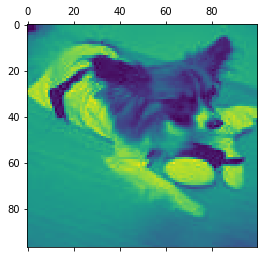

In [ ]:
plt.matshow(X[0])

Après whitening

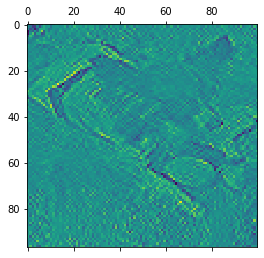

In [ ]:
plt.matshow(X_whitened[0])

Le but de cette approche est de décorréler les features entre eux, de façon à donner au modèle moins de données redondantes et donc d'améliorer les performances du modèle

In [ ]:
dump(X_whitened, "whitened_image.joblib")

['whitened_image.joblib']

In [ ]:
X = load("whitened_image.joblib")
Y = load("label.joblib")

## Data augmentation

In [ ]:
## j'ai mis ce processus directement dans l'architecture du modèle de deep learning, cf plus bas

# Modélisation Deep Learning

In [7]:
# Encodage des labels
le = preprocessing.LabelEncoder()
le.fit(Y)
Y_encoded = le.transform(Y)

In [ ]:
Y_encoded[:300]

array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_encoded, test_size=0.20, random_state = 7)

In [9]:
[img_height, img_width] = X_train[0].shape

# Impact de la fonction d'optimisation sur les performances du modèle

## CNN-ADAM

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_ADAM = cnn.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn.summary()

## CNN-SGD

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_SGD = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_SGD.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_SGD = cnn_SGD.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_SGD.summary()

## CNN RMSprop

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_RMSprop = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_RMSprop.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_RMSprop = cnn_RMSprop.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_RMSprop.summary()

## CNN Adadelta

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_Adadelta = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_Adadelta.compile(optimizer='Adadelta',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_Adadelta = cnn_Adadelta.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_Adadelta.summary()

## CNN Adagrad

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_Adagrad = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_Adagrad.compile(optimizer='Adagrad',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_Adagrad = cnn_Adagrad.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_Adagrad.summary()

## CNN Adamax

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_Adamax = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_Adamax.compile(optimizer='Adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_Adamax = cnn_Adamax.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_Adamax.summary()

## CNN Nadam

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_Nadam = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_Nadam.compile(optimizer='Nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_Nadam = cnn_Nadam.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_Nadam.summary()

## CNN Ftrl

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_Ftrl = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_Ftrl.compile(optimizer='Ftrl',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_Ftrl = cnn_Ftrl.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_Ftrl.summary()

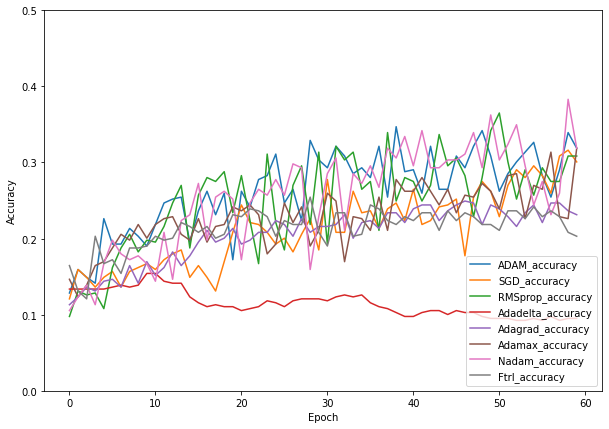

In [ ]:
#graphique de l'évaluation:
plt.figure(figsize=(10,7))
plt.plot(history_ADAM.history['val_accuracy'], label='ADAM_accuracy')
plt.plot(history_SGD.history['val_accuracy'], label = 'SGD_accuracy')
plt.plot(history_RMSprop.history['val_accuracy'], label = 'RMSprop_accuracy')
plt.plot(history_Adadelta.history['val_accuracy'], label = 'Adadelta_accuracy')
plt.plot(history_Adagrad.history['val_accuracy'], label = 'Adagrad_accuracy')
plt.plot(history_Adamax.history['val_accuracy'], label = 'Adamax_accuracy')
plt.plot(history_Nadam.history['val_accuracy'], label = 'Nadam_accuracy')
plt.plot(history_Ftrl.history['val_accuracy'], label = 'Ftrl_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 0.5])
plt.legend(loc='lower right')
plt.savefig("accuracy_functions_CNNs", dpi=400, format='png') 

# Impact de la fonction de loss sur les performances du modèle

## Sparse Categorical Cross Entropy

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_Adam_SCC = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_Adam_SCC.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_Adam_SCC = cnn_Adam_SCC.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_Adam_SCC.summary()

## Poisson

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_Adam_poisson = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_Adam_poisson.compile(optimizer='Adam',
              loss='poisson',
              metrics=['accuracy'])

history_Adam_poisson = cnn_Adam_poisson.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_Adam_poisson.summary()

## KLDivergence

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_Adam_KLD = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_Adam_KLD.compile(optimizer='Adam',
              loss='kl_divergence',
              metrics=['accuracy'])

history_Adam_KLD = cnn_Adam_KLD.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_Adam_KLD.summary()

## Hinge

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_Adam_hinge = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_Adam_hinge.compile(optimizer='Adam',
              loss='hinge',
              metrics=['accuracy'])

history_Adam_hinge = cnn_Adam_hinge.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_Adam_hinge.summary()

## Hinge

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_Adam_hinge = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_Adam_hinge.compile(optimizer='Adam',
              loss='hinge',
              metrics=['accuracy'])

history_Adam_hinge = cnn_Adam_hinge.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_Adam_hinge.summary()

## Squared Hinge

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_Adam_sq_hinge = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_Adam_sq_hinge.compile(optimizer='Adam',
              loss='squared_hinge',
              metrics=['accuracy'])

history_Adam_sq_hinge = cnn_Adam_sq_hinge.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_Adam_sq_hinge.summary()

## Categorical Hinge

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_Adam_cat_hinge = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_Adam_cat_hinge.compile(optimizer='Adam',
              loss='categorical_hinge',
              metrics=['accuracy'])

history_Adam_cat_hinge = cnn_Adam_cat_hinge.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_Adam_cat_hinge.summary()

## Résultats

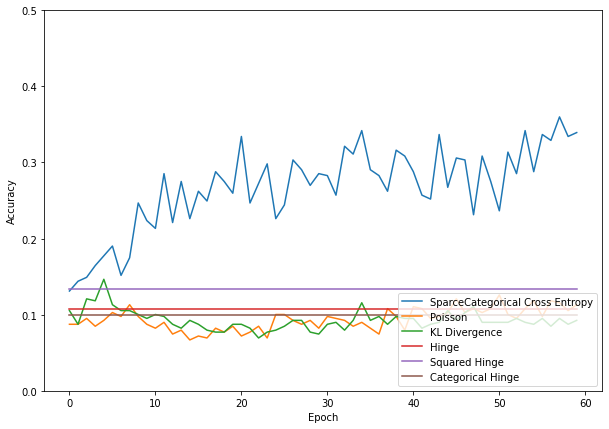

In [54]:
#graphique de l'évaluation:
plt.figure(figsize=(10,7))
plt.plot(history_Adam_SCC.history['val_accuracy'], label='SparceCategorical Cross Entropy')
plt.plot(history_Adam_poisson.history['val_accuracy'], label = 'Poisson')
plt.plot(history_Adam_KLD.history['val_accuracy'], label = 'KL Divergence')
plt.plot(history_Adam_hinge.history['val_accuracy'], label = 'Hinge')
plt.plot(history_Adam_sq_hinge.history['val_accuracy'], label = 'Squared Hinge')
plt.plot(history_Adam_cat_hinge.history['val_accuracy'], label = 'Categorical Hinge')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 0.5])
plt.legend(loc='lower right')
plt.savefig("losses_functions_CNNs", dpi=400, format='png') 

# Impact de la fonction d'activation sur les performances du modèle

## Softmax

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_softmax = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_softmax.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_softmax = cnn_softmax.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_softmax.summary()

## Relu

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_Adam_relu = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='relu') #nombre de label
])

cnn_Adam_relu.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_relu = cnn_Adam_relu.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_Adam_relu.summary()

## Sigmoid

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_sigmoid = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='sigmoid') #nombre de label
])

cnn_sigmoid.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_sigmoid = cnn_sigmoid.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_sigmoid.summary()

## Softplus

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_softplus = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softplus') #nombre de label
])

cnn_softplus.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_softplus = cnn_softplus.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_softplus.summary()

## Tanh

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_tanh = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='tanh') #nombre de label
])

cnn_tanh.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_tanh = cnn_tanh.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_tanh.summary()

## Résultats

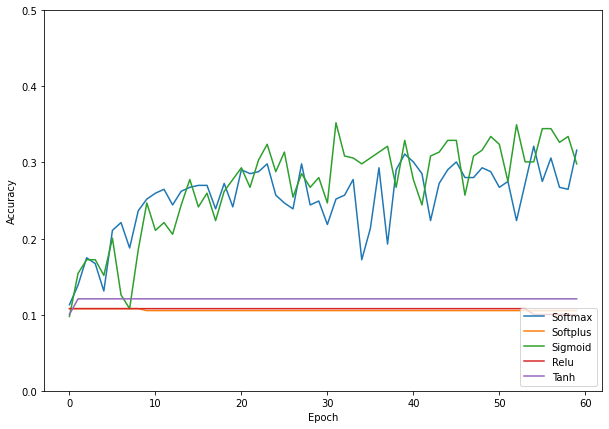

In [67]:
#graphique de l'évaluation:
plt.figure(figsize=(10,7))
plt.plot(history_softmax.history['val_accuracy'], label='Softmax')
plt.plot(history_softplus.history['val_accuracy'], label = 'Softplus')
plt.plot(history_sigmoid.history['val_accuracy'], label = 'Sigmoid')
plt.plot(history_tanh.history['val_accuracy'], label = 'Relu')
plt.plot(history_relu.history['val_accuracy'], label = 'Tanh')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 0.5])
plt.legend(loc='lower right')
plt.savefig("activation_functions_CNNs", dpi=400, format='png') 

13/13 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.1337
Classification Report: 
               precision    recall  f1-score   support

           0       0.30      0.83      0.45        52
           1       0.50      0.29      0.37        41
           2       0.68      0.33      0.45        39
           3       0.55      0.62      0.58        47
           4       0.20      0.04      0.07        25
           5       0.19      0.17      0.18        35
           6       1.00      0.05      0.09        42
           7       0.27      0.49      0.35        39
           8       0.44      0.21      0.28        39
           9       0.31      0.27      0.29        30

    accuracy                           0.36       389
   macro avg       0.45      0.33      0.31       389
weighted avg       0.46      0.36      0.33       389



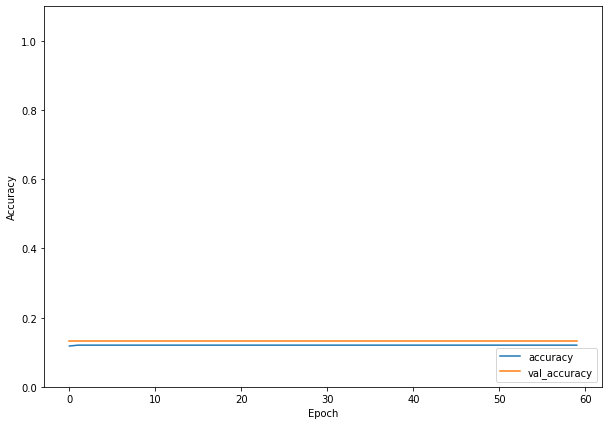

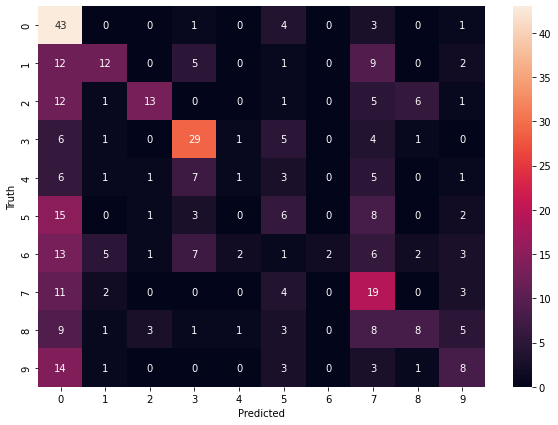

In [13]:
#graphique de l'évaluation:
plt.figure(figsize=(10,7))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.1])
plt.legend(loc='lower right')
plt.savefig("accuracy_function_CNN_SGD", dpi=400, format='png') 

cnn_SGD.evaluate(X_test,y_test)
y_predicted = cnn.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

#confusion matrix:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig("confusion_matrix_CNN_SGD", dpi=400, format='png') 

# rapport de classification:
print("Classification Report: \n", classification_report(y_test, y_predicted_labels))

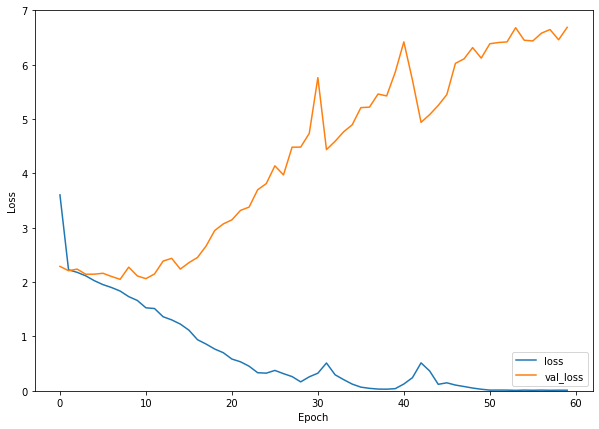

In [13]:
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 7])
plt.legend(loc='lower right')
plt.savefig("loss_function_CNN_data_augm_less", dpi=400, format='png') 

# Impact de l'architecture du modèle (drop and normalization batch)

## Avec Drop

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_drop_with = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    layers.Dropout(0.2),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.Dropout(0.2),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_drop_with.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_drop_with = cnn_drop_with.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_drop_with.summary()

## Sans Drop

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_drop_less = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_drop_less.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_drop_less = cnn_drop_less.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_drop_less.summary()

## Avec Batch normalization

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_with_batch_N = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.BatchNormalization(),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_with_batch_N.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_batch_N_with = cnn_with_batch_N.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_with_batch_N.summary()

## Drop + Batch Normalization

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_with_batch_drop = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_with_batch_drop.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_batch_drop_with = cnn_with_batch_drop.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_with_batch_drop.summary()

## Résultats

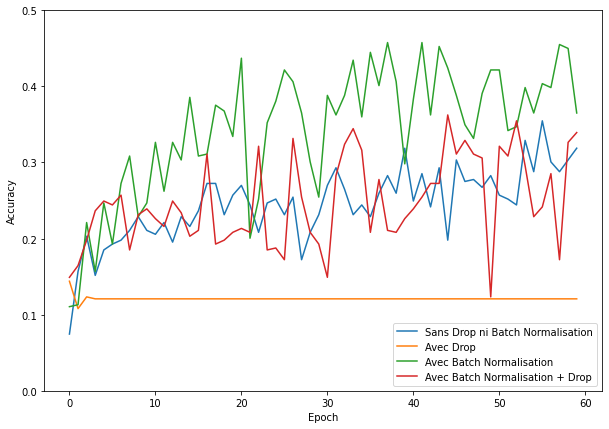

In [66]:
#graphique de l'évaluation:
plt.figure(figsize=(10,7))
plt.plot(history_drop_less.history['val_accuracy'], label='Sans Drop ni Batch Normalisation')
plt.plot(history_drop_with.history['val_accuracy'], label = 'Avec Drop')
plt.plot(history_batch_N_with.history['val_accuracy'], label = 'Avec Batch Normalisation')
plt.plot(history_batch_drop_with.history['val_accuracy'], label = 'Avec Batch Normalisation + Drop')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 0.5])
plt.legend(loc='lower right')
plt.savefig("drop_batch_CNNs", dpi=400, format='png') 

# Impact du flatten avant les couches denses

## Sans flatten

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_flatten_less = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.BatchNormalization(),
 
    #layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_flatten_less.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_flatten_less = cnn_flatten_less.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_flatten_less.summary()

## Avec flatten

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_with_flatten = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((4, 4)),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.BatchNormalization(),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_with_flatten.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_with_flatten = cnn_with_flatten.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_with_flatten.summary()

## Résultats

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_with_flatten = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((4, 4)),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.BatchNormalization(),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_with_flatten.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_with_flatten = cnn_with_flatten.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_with_flatten.summary()

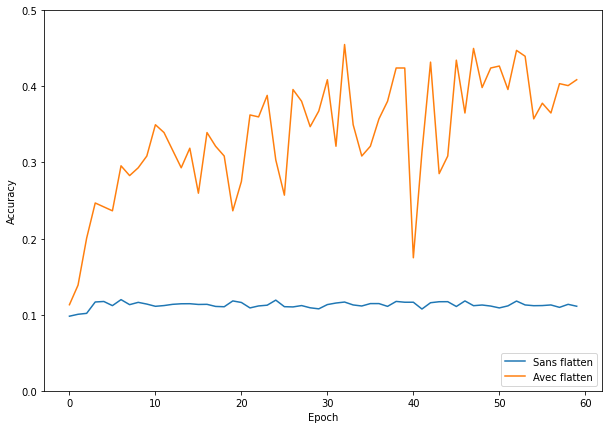

In [72]:
#graphique de l'évaluation:
plt.figure(figsize=(10,7))
plt.plot(history_flatten_less.history['val_accuracy'], label='Sans flatten')
plt.plot(history_with_flatten.history['val_accuracy'], label = 'Avec flatten')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 0.5])
plt.legend(loc='lower right')
plt.savefig("flatten_CNNs", dpi=400, format='png') 

# Modèle finale

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_with_flatten = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((4, 4)),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.BatchNormalization(),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_with_flatten.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_with_flatten = cnn_with_flatten.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_with_flatten.summary()

## Résultats

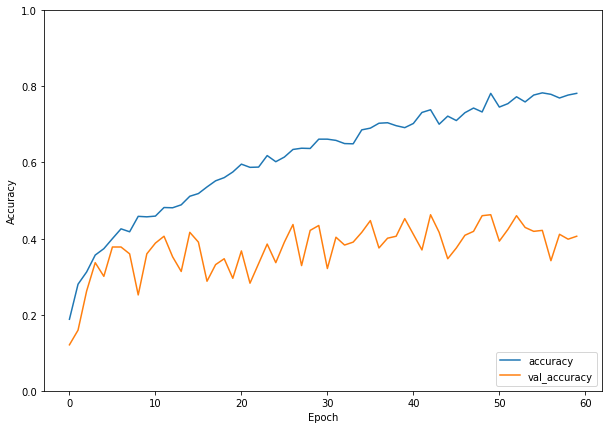

In [75]:
#graphique de l'évaluation:
plt.figure(figsize=(10,7))
plt.plot(history_with_flatten.history['accuracy'], label='accuracy')
plt.plot(history_with_flatten.history['val_accuracy'], label = 'val_accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')
plt.savefig("model_final_CNN", dpi=400, format='png') 

13/13 [==============================] - 0s 7ms/step - loss: 2.2267 - accuracy: 0.4062
Classification Report: 
               precision    recall  f1-score   support

           0       0.38      0.81      0.51        52
           1       0.49      0.44      0.46        41
           2       0.81      0.44      0.57        39
           3       0.75      0.45      0.56        47
           4       0.15      0.16      0.16        25
           5       0.19      0.37      0.25        35
           6       0.26      0.21      0.23        42
           7       0.41      0.28      0.33        39
           8       0.85      0.28      0.42        39
           9       0.57      0.40      0.47        30

    accuracy                           0.41       389
   macro avg       0.48      0.38      0.40       389
weighted avg       0.50      0.41      0.41       389



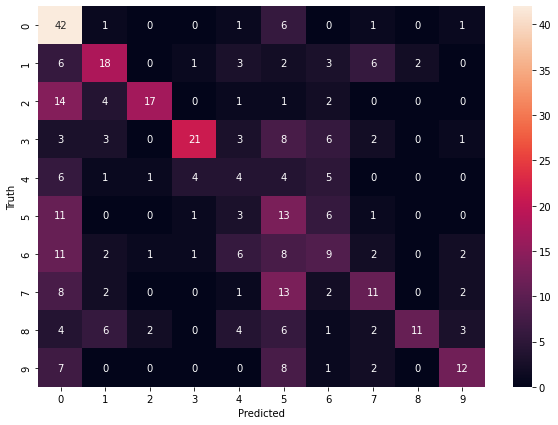

In [78]:
#performance du model
cnn_with_flatten.evaluate(X_test,y_test)
y_predicted = cnn_with_flatten.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

#confusion matrix:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig("confusion_matrix_model_final_CNN", dpi=400, format='png') 
# rapport de classification:

print("Classification Report: \n", classification_report(y_test, y_predicted_labels))

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

# Compréhension des erreurs du modèles

In [ ]:
print("id des photos avec label = 0")
print(np.where(Y_encoded==0))

print("id des photos avec label = 5")
print(np.where(Y_encoded==5))

id des photos avec label = 0
(array([569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581,
       582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594,
       595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607,
       608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620,
       621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633,
       634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646,
       647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659,
       660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672,
       673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685,
       686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698,
       699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711,
       712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724,
       725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737,
       738, 739, 740, 741, 742, 74

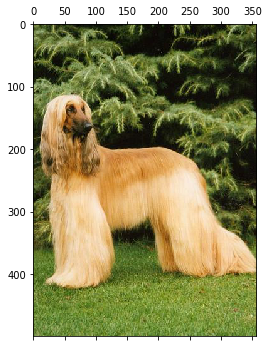

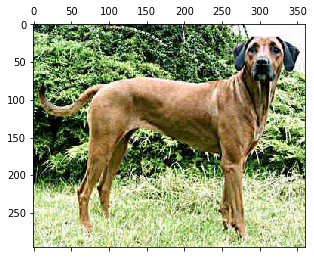

In [ ]:
#exemple de classification où il ne prédit pas très bien
plt.matshow(X_raw[574]) # ou 580, 570
plt.matshow(X_raw[1785])

In [ ]:
#Y_encoded[Y_encoded==1]
print("id des photos avec label = 1")
print(np.where(Y_encoded==1))

print("id des photos avec label = 7")
print(np.where(Y_encoded==7))

id des photos avec label = 1
(array([196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208,
       209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,
       222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234,
       235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247,
       248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260,
       261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273,
       274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286,
       287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299,
       300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312,
       313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325,
       326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338,
       339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351,
       352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,
       365, 366, 367, 368, 369, 37

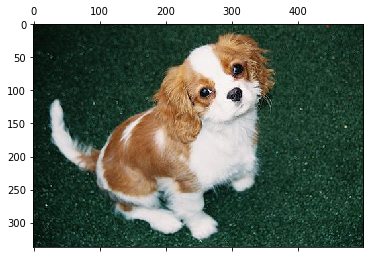

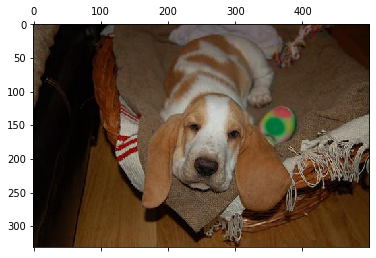

In [ ]:
#exemple de classification où il ne prédit pas très bien
plt.matshow(X_raw[197]) # ou 
plt.matshow(X_raw[816]) # ou 809, 810, 817, 823

In [ ]:
dump(cnn, "DL_baseline_model.joblib")

INFO:tensorflow:Assets written to: ram://2fa77c0f-f70c-4c41-a5e5-fe409bc1c8ba/assets


['DL_baseline_model.joblib']

In [19]:
DL_baseline_model = load("DL_baseline_model.joblib")
cnn = load("DL_baseline_model.joblib")

# Transfert Learning

regarder ce site :

https://www.kaggle.com/code/rajmehra03/a-comprehensive-guide-to-transfer-learning

In [ ]:
#TL pecific modules
from keras.applications.vgg16 import VGG16

# Poubelle, just in case

In [69]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_with_test = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.BatchNormalization(),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_with_test.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_test = cnn_with_test.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_with_test.summary()

Epoch 1/60
49/49 [==============================] - 4s 21ms/step - loss: 2.2901 - accuracy: 0.1771 - val_loss: 2.4756 - val_accuracy: 0.1260
Epoch 2/60
49/49 [==============================] - 1s 13ms/step - loss: 2.0611 - accuracy: 0.2511 - val_loss: 2.2338 - val_accuracy: 0.1877
Epoch 3/60
49/49 [==============================] - 1s 14ms/step - loss: 1.9809 - accuracy: 0.2988 - val_loss: 2.1073 - val_accuracy: 0.2494
Epoch 4/60
49/49 [==============================] - 1s 14ms/step - loss: 1.8770 - accuracy: 0.3361 - val_loss: 2.0825 - val_accuracy: 0.2699
Epoch 5/60
49/49 [==============================] - 1s 14ms/step - loss: 1.8406 - accuracy: 0.3548 - val_loss: 2.0872 - val_accuracy: 0.2622
Epoch 6/60
49/49 [==============================] - 1s 11ms/step - loss: 1.7699 - accuracy: 0.3806 - val_loss: 2.1106 - val_accuracy: 0.2468
Epoch 7/60
49/49 [==============================] - 0s 10ms/step - loss: 1.7392 - accuracy: 0.3825 - val_loss: 2.3393 - val_accuracy: 0.2211
Epoch 8/60
49

KeyboardInterrupt: ignored

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [ ]:
y_train[:5] #2D array
y_train = y_train.reshape(-1,)#convert to 1d array
y_train[:5] #1D array
y_test= y_test.reshape(-1,)

In [ ]:
image_filepath_sample = []
for path, dirs, files in os.walk(image_directory):
    for file in files:
        image_filepath_sample.append(os.path.join(path, file))

In [ ]:
image_filepath_sample = []
for path, dirs, files in os.walk(image_directory):
    for file in files:
        image_filepath_sample.append(os.path.join(path, file))

In [ ]:
len(image_filepath_sample)

1942

In [ ]:
image_filepath_sample = []
for i in range(1000):
    random_index = random.choice(range(0, len(image_filepath)))
    image_filepath_sample.append(image_filepath[random_index])

In [ ]:
len(image_filepath_sample)

1000

In [ ]:
image_filepath_sample[:10]

['Images_samples_10_races/n02085782-Japanese_spaniel/n02085782_4579.jpg',
 'Images_samples_10_races/n02085782-Japanese_spaniel/n02085782_698.jpg',
 'Images_samples_10_races/n02085782-Japanese_spaniel/n02085782_3420.jpg',
 'Images_samples_10_races/n02085782-Japanese_spaniel/n02085782_1353.jpg',
 'Images_samples_10_races/n02085782-Japanese_spaniel/n02085782_4365.jpg',
 'Images_samples_10_races/n02085782-Japanese_spaniel/n02085782_516.jpg',
 'Images_samples_10_races/n02085782-Japanese_spaniel/n02085782_2241.jpg',
 'Images_samples_10_races/n02085782-Japanese_spaniel/n02085782_191.jpg',
 'Images_samples_10_races/n02085782-Japanese_spaniel/n02085782_4772.jpg',
 'Images_samples_10_races/n02085782-Japanese_spaniel/n02085782_668.jpg']

In [ ]:
dirs

[]

In [ ]:
path

'Images_samples_10_races/n02087394-Rhodesian_ridgeback'

In [ ]:
for file in image_filepath_sample[:10]:
    print(path.split("-"))

['Images_samples_10_races/n02087394', 'Rhodesian_ridgeback']
['Images_samples_10_races/n02087394', 'Rhodesian_ridgeback']
['Images_samples_10_races/n02087394', 'Rhodesian_ridgeback']
['Images_samples_10_races/n02087394', 'Rhodesian_ridgeback']
['Images_samples_10_races/n02087394', 'Rhodesian_ridgeback']
['Images_samples_10_races/n02087394', 'Rhodesian_ridgeback']
['Images_samples_10_races/n02087394', 'Rhodesian_ridgeback']
['Images_samples_10_races/n02087394', 'Rhodesian_ridgeback']
['Images_samples_10_races/n02087394', 'Rhodesian_ridgeback']
['Images_samples_10_races/n02087394', 'Rhodesian_ridgeback']


In [ ]:
os.walk(image_directory)

<generator object walk at 0x7f3e940abdd0>

In [ ]:
for path, dirs, files in os.walk(image_directory):
    print(files[0])

IndexError: ignored

In [ ]:
for file in image_filepath_sample[:10]:
    print(file.split("-")[-1])

Japanese_spaniel/n02085782_4579.jpg
Japanese_spaniel/n02085782_698.jpg
Japanese_spaniel/n02085782_3420.jpg
Japanese_spaniel/n02085782_1353.jpg
Japanese_spaniel/n02085782_4365.jpg
Japanese_spaniel/n02085782_516.jpg
Japanese_spaniel/n02085782_2241.jpg
Japanese_spaniel/n02085782_191.jpg
Japanese_spaniel/n02085782_4772.jpg
Japanese_spaniel/n02085782_668.jpg


In [ ]:
############# lecture des fichiers image ###########
### Tout le dataset => collab crash sur les cellules suivantes du projet
X=[]
Y=[]
for path, dirs, files in os.walk(image_directory):
    for file in files:
        image = Image.open(file) 
        X.append(np.asarray(image))
        NomRace=path.split("-")[-1]
        Y.append(NomRace)
         


#convert images list to array
X=np.asarray(X)
Y=np.asarray(Y)

plt.matshow(X[10])
print(Y[10])

FileNotFoundError: ignored